# Business Understanding

Prediksi suhu maksimum harian berdasarkan data historis cuaca di kota London.

Proyek ini berada di domain weather forecasting atau climate-based prediction, dengan fokus pada data numerik seperti suhu, curah hujan, kelembaban, tekanan udara, dan lain-lain.



## Problem Statements

Data cuaca historis sudah tersedia dalam jumlah besar, tapi belum dimanfaatkan secara maksimal untuk memberikan prediksi yang bisa membantu masyarakat atau instansi pemerintah.

Permasalahannya:
Bagaimana cara memanfaatkan data tersebut untuk memprediksi suhu maksimum harian secara akurat?

## Goals

Tujuan utama dari proyek ini adalah:

Membuat model prediksi suhu maksimum harian berdasarkan fitur cuaca lainnya.

Mencapai akurasi prediksi minimal 80%.

Menyediakan hasil prediksi ini dalam bentuk aplikasi mobile yang mudah digunakan.



## Solution Statements

Solusi yang saya kembangkan terdiri dari beberapa tahap:

Mengambil dataset cuaca London dari Kaggle.

Melakukan analisis dan praproses data.

Membangun model prediksi menggunakan Artificial Neural Network (ANN).

Mengevaluasi model sampai akurasinya minimal 80%.

Mengimplementasikan model ini ke dalam aplikasi Android untuk memudahkan pengguna dalam melakukan simulasi prediksi suhu.

# Data Understanding

## Import data dari kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mriosofiellapoetra33","key":"203c307382890c1c4297efb4e64ffe75"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [9]:
!kaggle datasets download -d zongaobian/london-weather-data-from-1979-to-2023
!ls


Dataset URL: https://www.kaggle.com/datasets/zongaobian/london-weather-data-from-1979-to-2023
License(s): CC0-1.0
  0% 0.00/292k [00:00<?, ?B/s]
100% 292k/292k [00:00<00:00, 181MB/s]
kaggle.json	     london-weather-data-from-1979-to-2023.zip
london-weather-data  sample_data


In [10]:
!mkdir -p london-weather-data
!unzip -o -q london-weather-data-from-1979-to-2023.zip -d london-weather-data
!ls london-weather-data

london_weather_data_1979_to_2023.csv


## Import Library yang dibutuhkan

In [39]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score



import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam



In [16]:
df = pd.read_csv("/content/london-weather-data-from-1979-to-2023.zip")

In [18]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')

## Exploratory Data Analysis

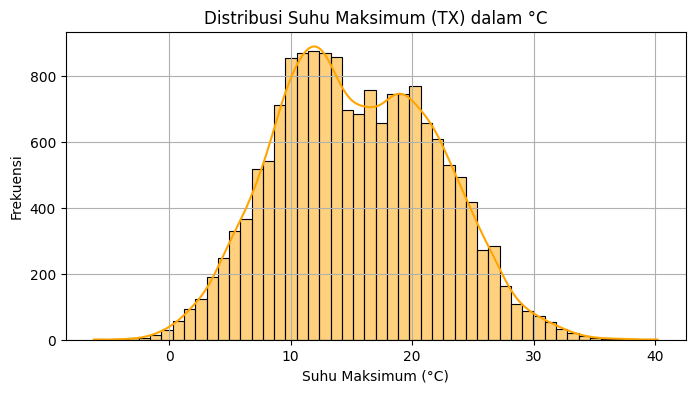

In [19]:
plt.figure(figsize=(8, 4))
sns.histplot(df['TX'] / 10, kde=True, bins=50, color='orange')
plt.title('Distribusi Suhu Maksimum (TX) dalam °C')
plt.xlabel('Suhu Maksimum (°C)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()


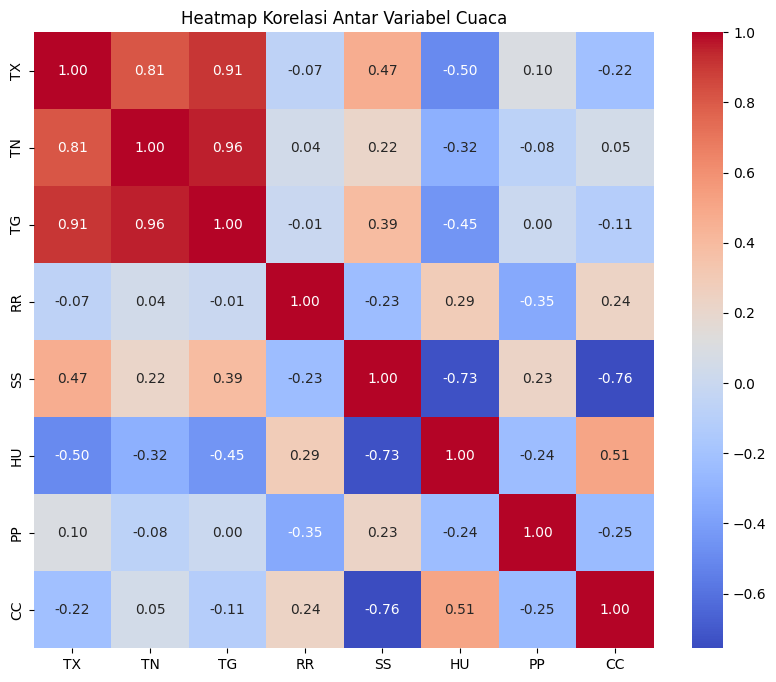

In [20]:
plt.figure(figsize=(10, 8))
main_features = ['TX', 'TN', 'TG', 'RR', 'SS', 'HU', 'PP', 'CC']
sns.heatmap(df[main_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel Cuaca')
plt.show()


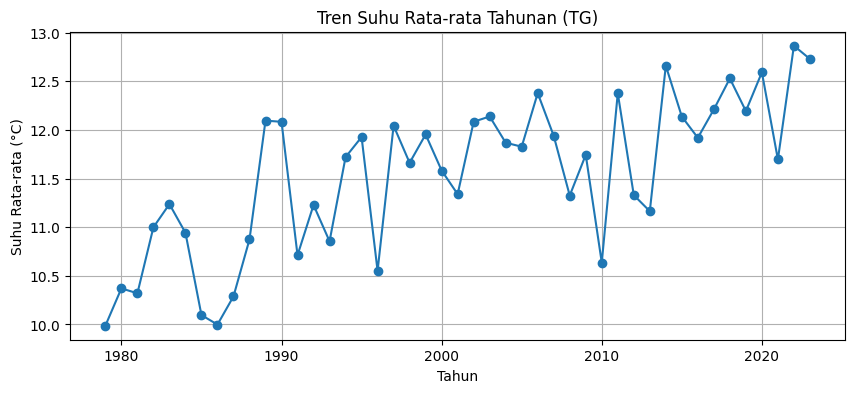

In [21]:
df['year'] = df['DATE'].dt.year
avg_temp_year = df.groupby('year')['TG'].mean() / 10

plt.figure(figsize=(10, 4))
avg_temp_year.plot(marker='o')
plt.title('Tren Suhu Rata-rata Tahunan (TG)')
plt.xlabel('Tahun')
plt.ylabel('Suhu Rata-rata (°C)')
plt.grid(True)
plt.show()


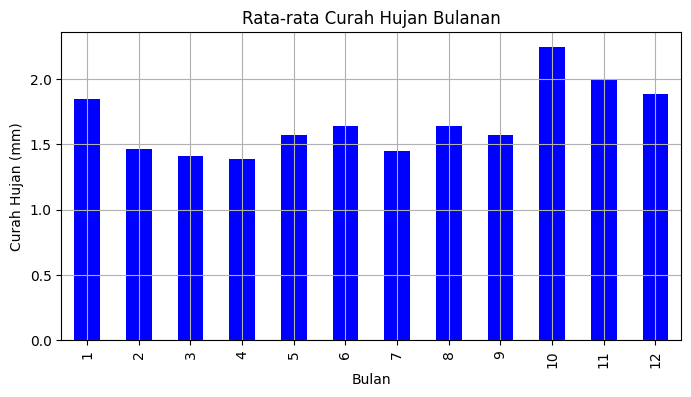

In [22]:
df['month'] = df['DATE'].dt.month
monthly_rain = df.groupby('month')['RR'].mean() / 10

plt.figure(figsize=(8, 4))
monthly_rain.plot(kind='bar', color='blue')
plt.title('Rata-rata Curah Hujan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Curah Hujan (mm)')
plt.grid(True)
plt.show()


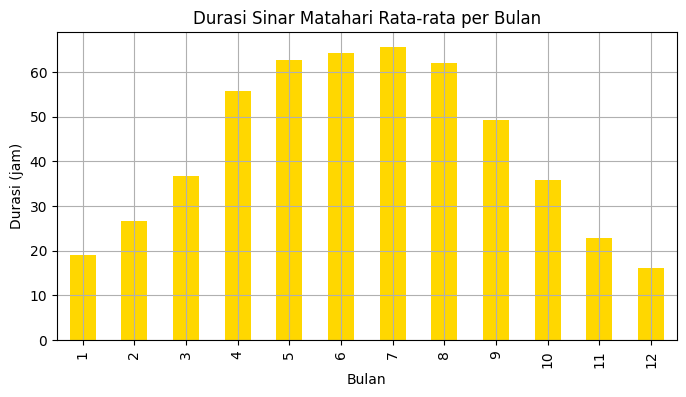

In [23]:
monthly_sun = df.groupby('month')['SS'].mean()

plt.figure(figsize=(8, 4))
monthly_sun.plot(kind='bar', color='gold')
plt.title('Durasi Sinar Matahari Rata-rata per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Durasi (jam)')
plt.grid(True)
plt.show()


# Data Preparation

In [24]:

features = ['TN', 'TG', 'RR', 'SS', 'HU', 'PP', 'CC']
target = 'TX'


In [25]:

data = df[features + [target]].dropna()


In [26]:

X = data[features]
y = data[target]


In [27]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [28]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


In [29]:
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)


X_train: (13065, 7)
X_test : (3267, 7)


# Modeling

In [31]:

model = Sequential()

In [34]:

model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))

In [35]:

model.add(Dense(32, activation='relu'))

In [36]:

model.add(Dense(1))

In [37]:

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])


In [38]:

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 109.0711 - mae: 109.0711 - val_loss: 29.3957 - val_mae: 29.3957
Epoch 2/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 29.2005 - mae: 29.2005 - val_loss: 21.8971 - val_mae: 21.8971
Epoch 3/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 23.0333 - mae: 23.0333 - val_loss: 18.6012 - val_mae: 18.6012
Epoch 4/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 20.8399 - mae: 20.8399 - val_loss: 18.0738 - val_mae: 18.0738
Epoch 5/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 20.3287 - mae: 20.3287 - val_loss: 17.8566 - val_mae: 17.8566
Epoch 6/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 20.1208 - mae: 20.1208 - val_loss: 18.1327 - val_mae: 18.1327
Epoch 7/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 20.4261 - mae: 20.4261 - val_loss: 17.4888 - val_mae: 17.4888
Epoch 8/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 19.6048 - mae: 19.6048 - val_loss: 17.6467 - val_mae: 17.6467
Epoch 9/50
327/327 ━━━

# Evaluation

In [41]:

y_pred = model.predict(X_test).flatten()

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [42]:

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [43]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score (Akurasi): {r2:.2%}")

Mean Absolute Error (MAE): 18.39
R² Score (Akurasi): 86.89%


# Deployment

## Model Simulation

## Save Model